In [25]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Linear Regression to predict days until trending

In [26]:
df = pd.read_csv('../0_data/DEvideos.csv')

In [27]:
df['trending_date'] = df.apply(lambda row: datetime.strptime(row['trending_date'], '%y.%d.%m'), axis=1)
df['publish_time'] = df.apply(lambda row: datetime.strptime(row['publish_time'], '%Y-%m-%dT%H:%M:%S.000Z'), axis=1)
df['days_until_trending'] = df.apply(lambda row: ((row['trending_date'] - row['publish_time']).days + 1), axis=1)

dropColumns = ['video_id', 'title', 'tags', 'thumbnail_link', 'description']

df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,days_until_trending
0,LgVi6y5QIjM,2017-11-14,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13 17:08:49,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,1
1,Bayt7uQith4,2017-11-14,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12 22:30:01,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,2
2,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",1
3,AHtypnRk7JE,2017-11-14,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12 15:00:01,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,2
4,ZJ9We4bjcg0,2017-11-14,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12 13:10:36,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...,2


# Input of tag factor

In [28]:
tag_df = pd.read_csv('../0_data/tags.csv')
tag_df = tag_df.set_index('tag')
tag_df.head()

,factor,count
tag,,
full game,0.880435,23
split,0.862500,20
wellness,0.852273,22
neuer modus,0.843750,24
lcs,0.840909,22


## Converter function

In [29]:
def calculate_tag_factor(tag_string, tag_data):
    tag_list = pd.Series(list(set(map(lambda x: x.strip('\"').lower(), tag_string.split('|')))))
    return tag_list.apply(lambda tag: tag_data['factor'].get(tag, np.nan)).mean(skipna=True)

## Test function

In [30]:
df['tag_factors'] = df['tags'].apply(lambda x: calculate_tag_factor(x, tag_df))
df['tag_factors'] = df.apply(lambda row: 0 if np.isnan(row['tag_factors']) else row['tag_factors'], axis=1)
df[['channel_title','tags','tag_factors']]


,channel_title,tags,tag_factors
0,inscope21,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",0.512928
1,LUKE! Die Woche und ich,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",0.612439
2,LastWeekTonight,"last week tonight trump presidency|""last week ...",0.686567
3,100SekundenPhysik,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",0.633594
4,rezo,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",0.541702
...,...,...,...
40835,Kingdom Hearts,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Pirat...",0.725610
40836,YourMovieSucksDOTorg,[none],0.000000
40837,Grünwald Freitagscomedy,"Günter Grünwald|""Grünwald Freitagscomedy""|""Gün...",0.661601
40838,Assassin's Creed DE,"Assassin's Creed|""Assassins Creed""|""Assassin's...",0.654359


# days_until_trending could be analyzed with views, likes, dislikes and comment_count

In [31]:
df.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
days_until_trending                int64
tag_factors                      float64
dtype: object

# Split in Test- and Training values

In [32]:
x = pd.DataFrame(df['views'])
y = pd.DataFrame(df['days_until_trending'])

x = preprocessing.scale(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [33]:
# train the model using the training set and calculate a score
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

-0.0002334973824802411

predicted response:
[[1.76171622]
 [1.79393893]
 [1.88991793]
 ...
 [1.74829634]
 [1.81418145]
 [1.76547716]]
intercept: 1.7824717458958321
slope: 0.13902943793283398
coefficient of determination: 3.112149653672347e-05


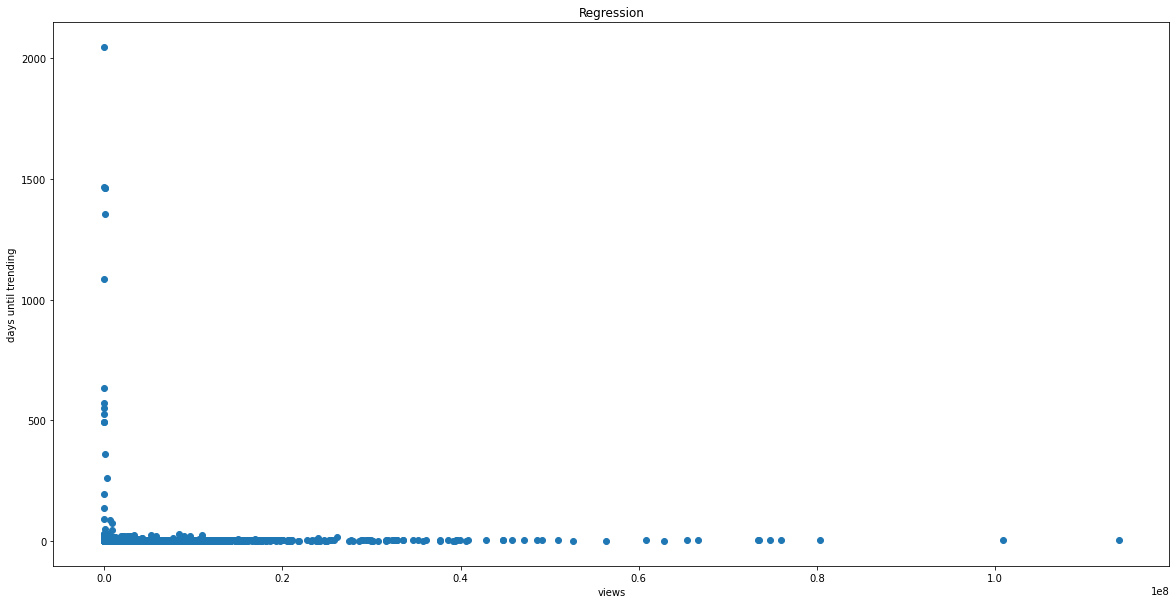

In [34]:
# Prediction of the values
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

intercept = model.intercept_[0]
slope = model.coef_[0, 0]
r_sq = model.score(x, y)
print('intercept:', intercept)
print('slope:', slope)
print('coefficient of determination:', r_sq)

# plot
plt.figure(figsize=(20, 10))
plt.title("Regression")
plt.xlabel("views")
plt.ylabel("days until trending")
plt.scatter(df.views, df.days_until_trending)
#plt.xlim(0, 900000)

# Plot regression grade
# t = np.array([min(x.loc[:, "Length1"]), max(x.loc[:, "Length1"])])
# t = t.reshape(-1, 1)
# plt.plot(t, model.predict(t), "-r")

plt.show()

# Filter out some Data for a better result

In [35]:
filter = len(df[df['days_until_trending'] > 6])

print(filter, "rows will be dropped")

rows = len(df.index)

print("That are", 100/rows*filter, "%")

# get names of indexes
index_names = df[ df['days_until_trending'] >= 6 ].index

# drop these row indexes from dataFrame
df.drop(index_names, inplace = True)

252 rows will be dropped
That are 0.6170421155729677 %


# Train and fit the model

In [36]:
# use views, likes, dislikes and comment_count
x = df.iloc[:,7:11]
# only use views
#x = pd.DataFrame(df['views'])
y = pd.DataFrame(df['days_until_trending'])

x = preprocessing.scale(x)

# split again in training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [37]:
# train the model using the training set and calculate a score
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.055894775715535805

## Data are not well spread
## Method is not applicable this way (see the plot)

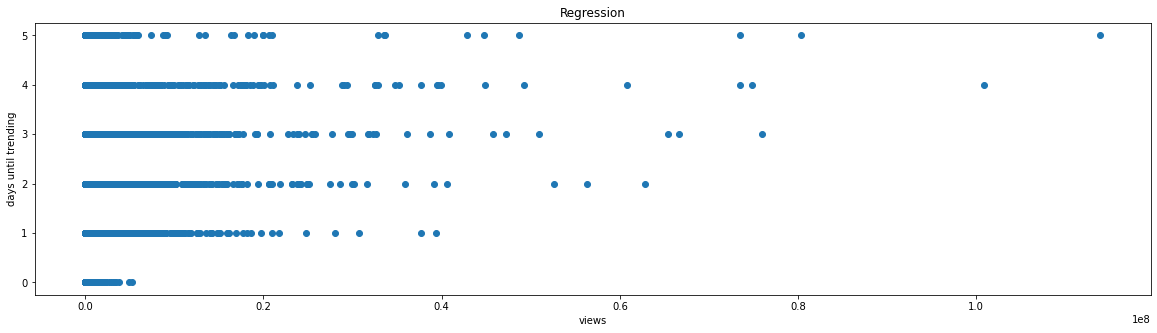

In [38]:
# plot
plt.figure(figsize=(20, 5))
plt.title("Regression")
plt.xlabel("views")
plt.ylabel("days until trending")
plt.scatter(df.views, df.days_until_trending)
